In [6]:
import pandas as pd
from google.colab import drive 
drive.mount('/gdrive', force_remount=True)
import tensorflow.compat.v1 as tf
import numpy as np
import seaborn as sns

Mounted at /gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_train = pd.read_csv("/gdrive/My Drive/Kaggle/nlp-getting-started/train.csv")
df_test = pd.read_csv("/gdrive/My Drive/Kaggle/nlp-getting-started/test.csv")
df_=pd.concat([df_train, df_test], axis=0)
df_.reset_index(inplace=True)
df_.drop(['index'],axis=1, inplace=True)
split_length = df_train.shape[0]

In [41]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [34]:
print(df_train['location'].describe())
print('Nombre de Nan:', df_train['location'].isna().sum())

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object
Nombre de Nan: 2533


In [33]:
print(df_train['keyword'].describe())
print('Nombre de Nan:', df_train['keyword'].isna().sum())

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object
Nombre de Nan: 61


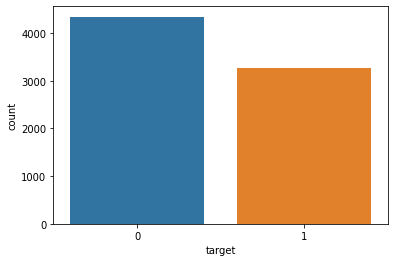

In [8]:
sns.countplot(x=df_train['target'])

In [0]:
from keras.utils import to_categorical
target=df_train.target.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

In [46]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english') # Mots sans informations 
porter = PorterStemmer()
new_phrase=[]

for i in range(df_.shape[0]):
  words = df_['text'].iloc[i]
  tokens = word_tokenize(words)
  tok = [word for word in tokens if word.isalpha()]
  tok = [word.lower() for word in tok]
  tok_ = [word for word in tok if not word in stop_words]
  stemmed = [porter.stem(word) for word in tok_]
  new_phrase.append(stemmed)
df_['NewText'] = new_phrase # liste de mots racinalisés en lower case et sans ponctuation

In [0]:
length=[]
for e in new_phrase:
  length.append(len(e))
max_length = max(length)# Nombre de mots distincts dans l'avis en contenant le plus

In [0]:
count=0
score=[]
j=0
for i in df_['NewText']:
  if len(i) == 0:
    count+=1 # Nombre de ligne ou aucun mot n'apparait (à priori la target devrait être égale à 0)
    score.append(df_['target'].iloc[j])
  j+=1

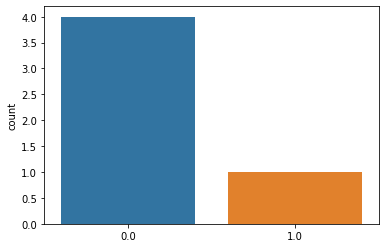

In [52]:
sns.countplot(x=score) # Regarder de plus près le tweet ayant une target égale à 1

In [54]:
vocab=[]
for i in df_['NewText']:
  vocab+=i
len(vocab) # On concatene ici tous les avis nettoyés

99983

In [0]:
import collections
cnt = collections.Counter() # On crée un compteur pour compter l'apparition de chaque mot
for word in vocab:
  cnt[word] += 1

In [116]:
min_occurane = 3 # On filtre les mots apparaissante moins de min_occurane fois
tokens = [k for k,c in cnt.items() if c >= min_occurane] # Liste des mots distincts conservés
n_words = len(tokens)
print(n_words)

4381


In [0]:
df_copy=df_.copy() # On crée un copie du DF original pour ne pas risquer d'écraser les data
for i in range(df_['NewText'].shape[0]):
  token_ =[w for w in df_['NewText'].iloc[i] if w in tokens]
  df_copy.at[i,'NewText'] = token_ # la colonne 'Text' est recréee et appelée 'NewText'. Elle correspond à la colonne 'Phrase' mais totalement nettoyée:
  # Plus de ponctuation, plus de uppercase, uniquement de mots racinalisés, plus de stop_words

In [0]:
lenght=[]
for i in df_['NewText']:
  length.append(len(i))
max_length = max(length) # Avis ayant le plus grands nombre de mots après nettoyage

In [0]:
from keras.preprocessing import sequence
X=[]
Y=[]
for i in range(df_.shape[0]):
  X.append(df_['NewText'].iloc[i]) # On crée un liste de liste contenant les 'NewText' sous forme de liste

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(X) #Fitter sur tokens: la liste de mots distincts ? Non car les mots distincts sont labélisés
# Il faut donc surement utiliser 

X = tokenizer.texts_to_sequences(X)
X = sequence.pad_sequences(X, maxlen=max_length, padding='pre') # Zero padding pour normaliser la longueur de chaque avis

In [0]:
x_train = X[0:split_length,:] # On récupère le train_set preparé pour entrainer le NN
x_sub = X[split_length:,:] # On récupère le test set préparé pour ensuite faire une soumission

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_target, test_size=0.2, random_state=1) # On split les data en train set et validation set

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import models
from keras.losses import categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_accuracy', patience = 2) # Eviter d'overfitter
callback = [early_stopping]

In [132]:
model=models.Sequential()
model.add(layers.Embedding(input_dim=n_words, output_dim=300, input_length=max_length))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 22, 300)           1314300   
_________________________________________________________________
lstm_28 (LSTM)               (None, 22, 64)            93440     
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 130       
Total params: 1,445,054
Trainable params: 1,445,054
Non-trainable params: 0
___________________________________________

In [133]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=7, batch_size=128, verbose=1, callbacks=callback)

Epoch 1/7
48/48 [==============================] - 7s 136ms/step - loss: 0.6352 - accuracy: 0.6373 - val_loss: 0.5116 - val_accuracy: 0.7682
Epoch 2/7
48/48 [==============================] - 6s 121ms/step - loss: 0.4060 - accuracy: 0.8278 - val_loss: 0.4464 - val_accuracy: 0.8011
Epoch 3/7
48/48 [==============================] - 6s 122ms/step - loss: 0.3183 - accuracy: 0.8741 - val_loss: 0.4760 - val_accuracy: 0.7951
Epoch 4/7
48/48 [==============================] - 6s 122ms/step - loss: 0.2706 - accuracy: 0.8959 - val_loss: 0.5397 - val_accuracy: 0.7892


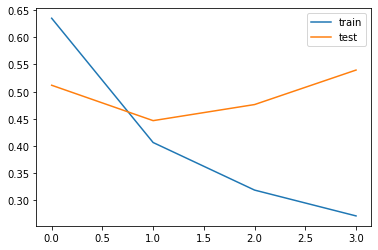

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

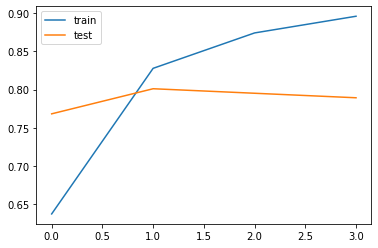

In [135]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [240]:
df_copy_train = df_train.copy().drop(['location'],axis=1).fillna(value='Nan')
df_copy_train.head(5)

,id,keyword,text,target
0,1,Nan,Our Deeds are the Reason of this #earthquake M...,1
1,4,Nan,Forest fire near La Ronge Sask. Canada,1
2,5,Nan,All residents asked to 'shelter in place' are ...,1
3,6,Nan,"13,000 people receive #wildfires evacuation or...",1
4,7,Nan,Just got sent this photo from Ruby #Alaska as ...,1


In [241]:
df_copy_test = df_test.copy().drop(['location'],axis=1).fillna(value='Nan')
df_copy_test.head(5)

,id,keyword,text
0,0,Nan,Just happened a terrible car crash
1,2,Nan,"Heard about #earthquake is different cities, s..."
2,3,Nan,"there is a forest fire at spot pond, geese are..."
3,9,Nan,Apocalypse lighting. #Spokane #wildfires
4,11,Nan,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
split_train_length = df_copy_train.shape[0]

In [0]:
df_copy_ = pd.concat([df_copy_train.drop(['target'],axis=1),df_copy_test],axis=0)

In [0]:
dummy=pd.get_dummies(df_copy_['keyword'])
list_=list(dummy)

j=0
for n in list_:
    df_copy_[n]=dummy[n]
    j+=1
    if j>=len(list_)-1:
        break
del(dummy, list_)

In [0]:
df_dummy = df_copy_.drop(['id', 'keyword', 'text'], axis=1).values

In [0]:
X_train = df_dummy[0:split_train_length,:]
Y_train = df_copy_train['target'].values
X_pred = df_dummy[split_train_length:,:]

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) 

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=500)
parameters = {'penalty':['l2'],
             'solver': ['lbfgs'],
             'C': [1.0]}
grid = GridSearchCV(estimator=logit, param_grid = parameters, cv=10)
grid.fit(x_train, y_train)
print("Train_score = %3.2f" %(grid.score(x_train, y_train)))
print("Test_score = %3.2f" %(grid.score(x_val, y_val)))
print(grid.best_params_)

Train_score = 0.75
Test_score = 0.74
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
